# K-Means Clustering

In [49]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Inline matplot
%matplotlib inline

## Data Pre-processing

In [50]:
# Importing the dataset
dataset = pd.read_csv("cars.csv")

In [51]:
X = dataset[dataset.columns[:-1]]
X = X.convert_objects(convert_numeric=True)
X.head()

/home/hyacinth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350.0,165,4209.0,12,1972
1,31.9,4,89.0,71,1925.0,14,1980
2,17.0,8,302.0,140,3449.0,11,1971
3,15.0,8,400.0,150,3761.0,10,1971
4,30.5,4,98.0,63,2051.0,17,1978


In [52]:
# Eliminating Null values
for i in X.columns:
    X[i] = X[i].fillna(int(X[i].mean()))
    
# for i in X.columns:
#     print(X[i].isnull().sum())

## Modeling

### Choose K (Elbow Method)

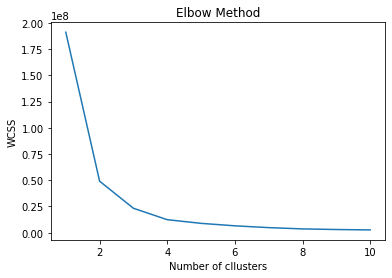

In [53]:
# Using elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of cllusters')
plt.ylabel('WCSS')
plt.show()

In [54]:
# Applying K-means to the cars dataset

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=10)
y_kmeans = kmeans.fit_predict(X)
X = X.as_matrix(columns=None)

/home/hyacinth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


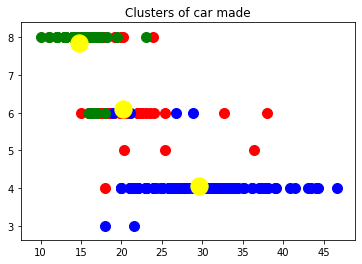

In [55]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label='US Made')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label='Europe Made')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label='Japan Made')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='centroids')
plt.title('Clusters of car made')
plt.legend
plt.show()